In [1]:
pip install -q yfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anmol\Downloads\My-ML-Class\ML-Projects\Stock-Price_Prediction\venv\Scripts\python.exe -m pip install --upgrade pip' command.


The code imports necessary libraries and sets up data retrieval from Yahoo Finance for four tech stocks (Apple, Google, Microsoft, and Amazon). It then concatenates the data into a single DataFrame 'df' and adds a 'company_name' column to identify each company's data in the DataFrame.






In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-10-30,129.720001,133.000000,128.559998,132.710007,132.710007,72485500,AMAZON
2023-10-31,132.750000,133.570007,131.710007,133.089996,133.089996,51589400,AMAZON
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,AMAZON
2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMAZON
2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMAZON
2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMAZON
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMAZON
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMAZON
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,165.616281,167.299520,164.214520,165.855480,165.323640,6.274546e+07
std,18.326312,18.180945,18.486624,18.328082,18.469414,1.861359e+07
min,126.010002,127.769997,124.169998,125.019997,124.325081,3.145820e+07
25%,150.107498,151.567497,148.230000,150.745003,149.981621,5.015355e+07
50%,170.989998,172.984993,170.024994,171.155006,170.929817,5.831935e+07
75%,179.104996,180.262505,177.347504,179.050007,178.749092,6.982400e+07
max,196.240005,198.229996,195.279999,196.449997,195.926956,1.601569e+08


We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-11-14 to 2023-11-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price

The code creates a 2x2 grid of subplots, each showing the historical view of the adjusted closing price for one of the four tech companies (Apple, Google, Microsoft, and Amazon) over time.



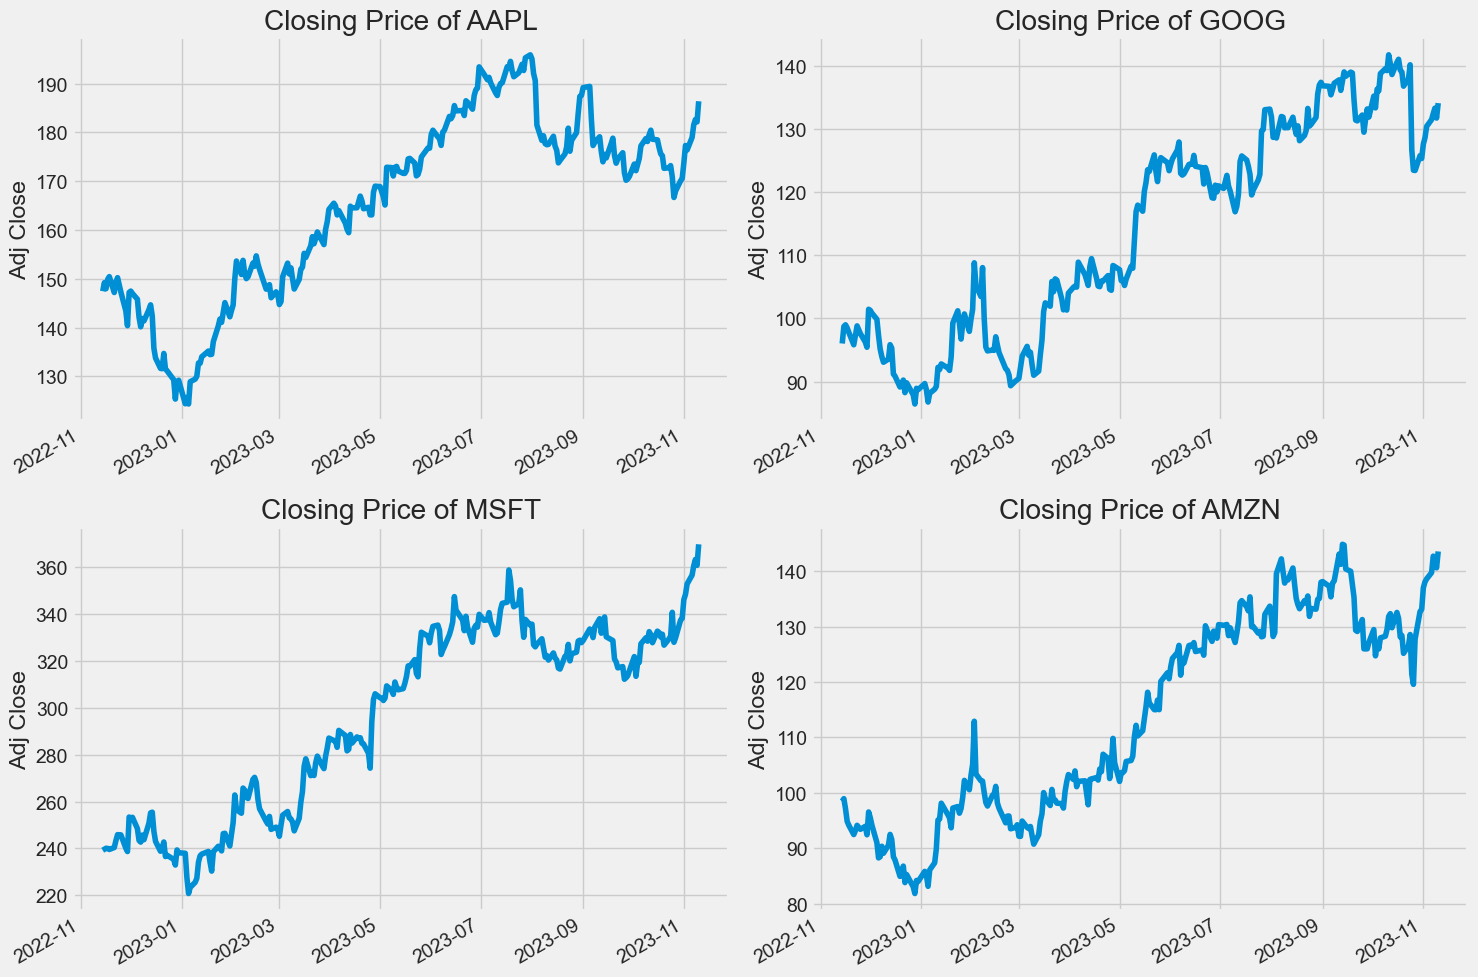

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
The code creates a 2x2 grid of subplots, each showing the total volume of stock traded for one of the four tech companies (Apple, Google, Microsoft, and Amazon) on each trading day over time.










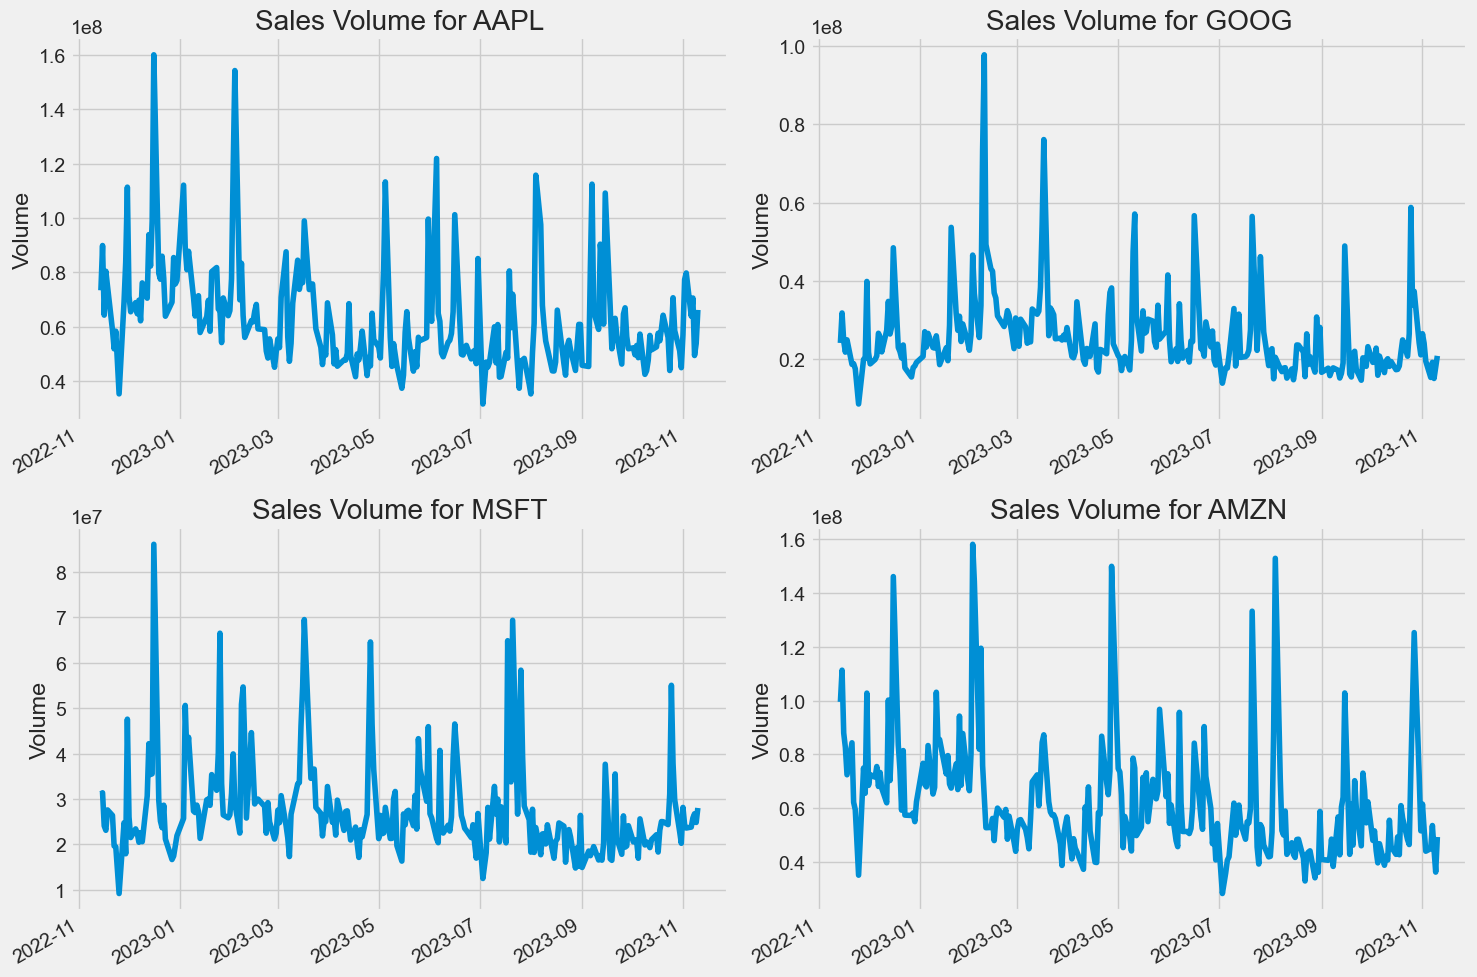

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

# 2. What was the moving average of the various stocks?

The code calculates and plots moving averages (MA) for different time windows (10, 20, and 50 days) for each of the four tech companies (Apple, Google, Microsoft, and Amazon). The plot shows the adjusted closing price along with the corresponding moving averages for each company in separate subplots.






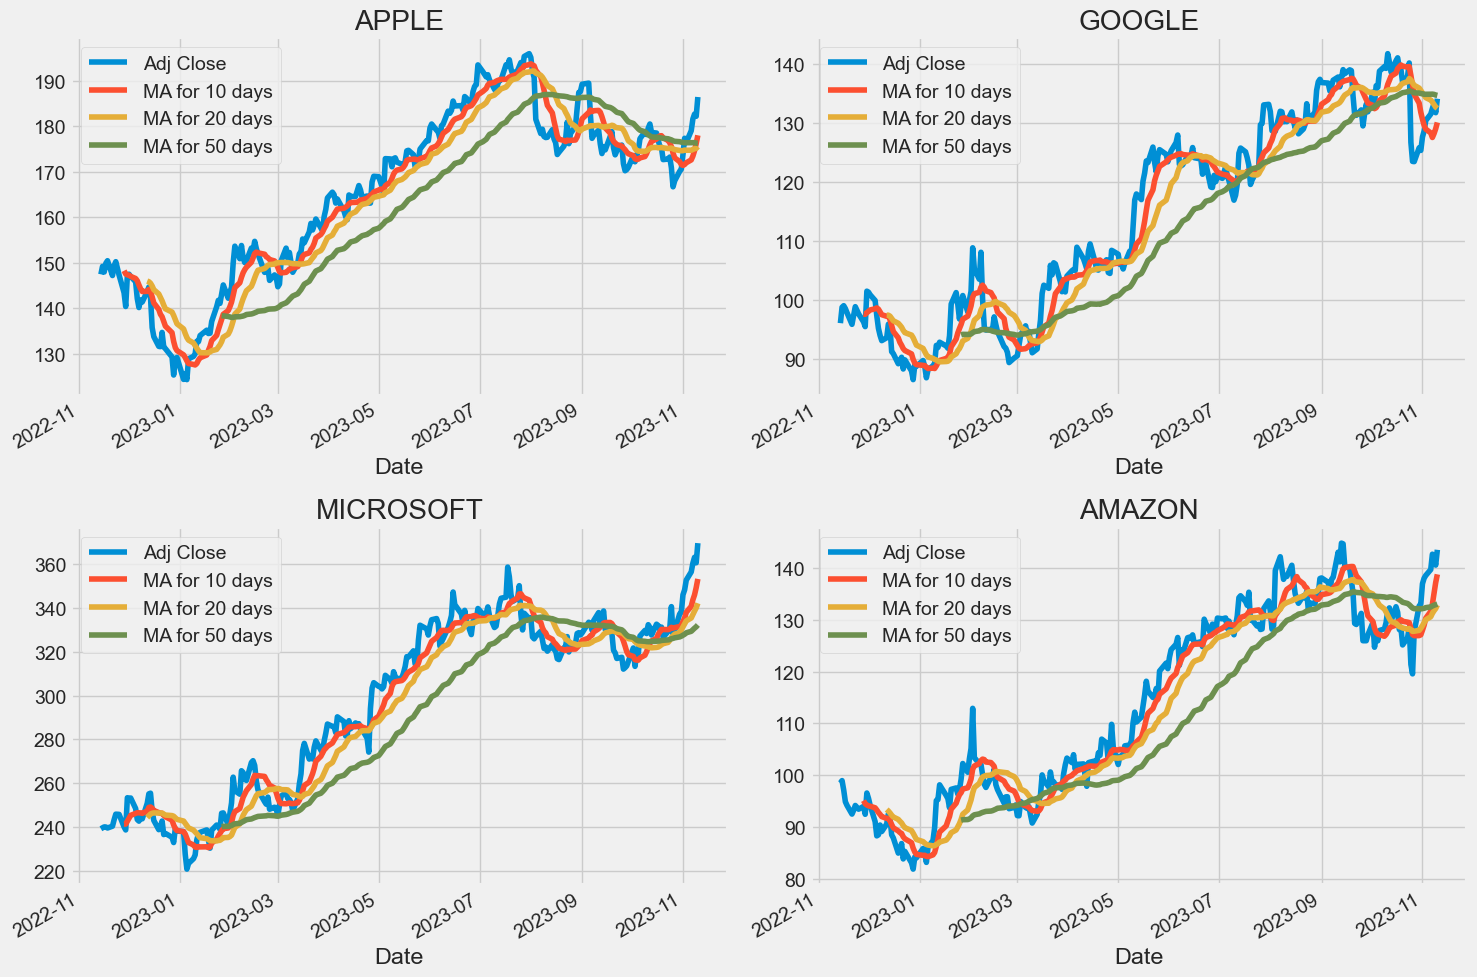

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

The code calculates and plots the daily percentage change (daily return) in the adjusted closing price for each of the four tech companies (Apple, Google, Microsoft, and Amazon). The plot displays the daily return time series for each company in separate subplots.






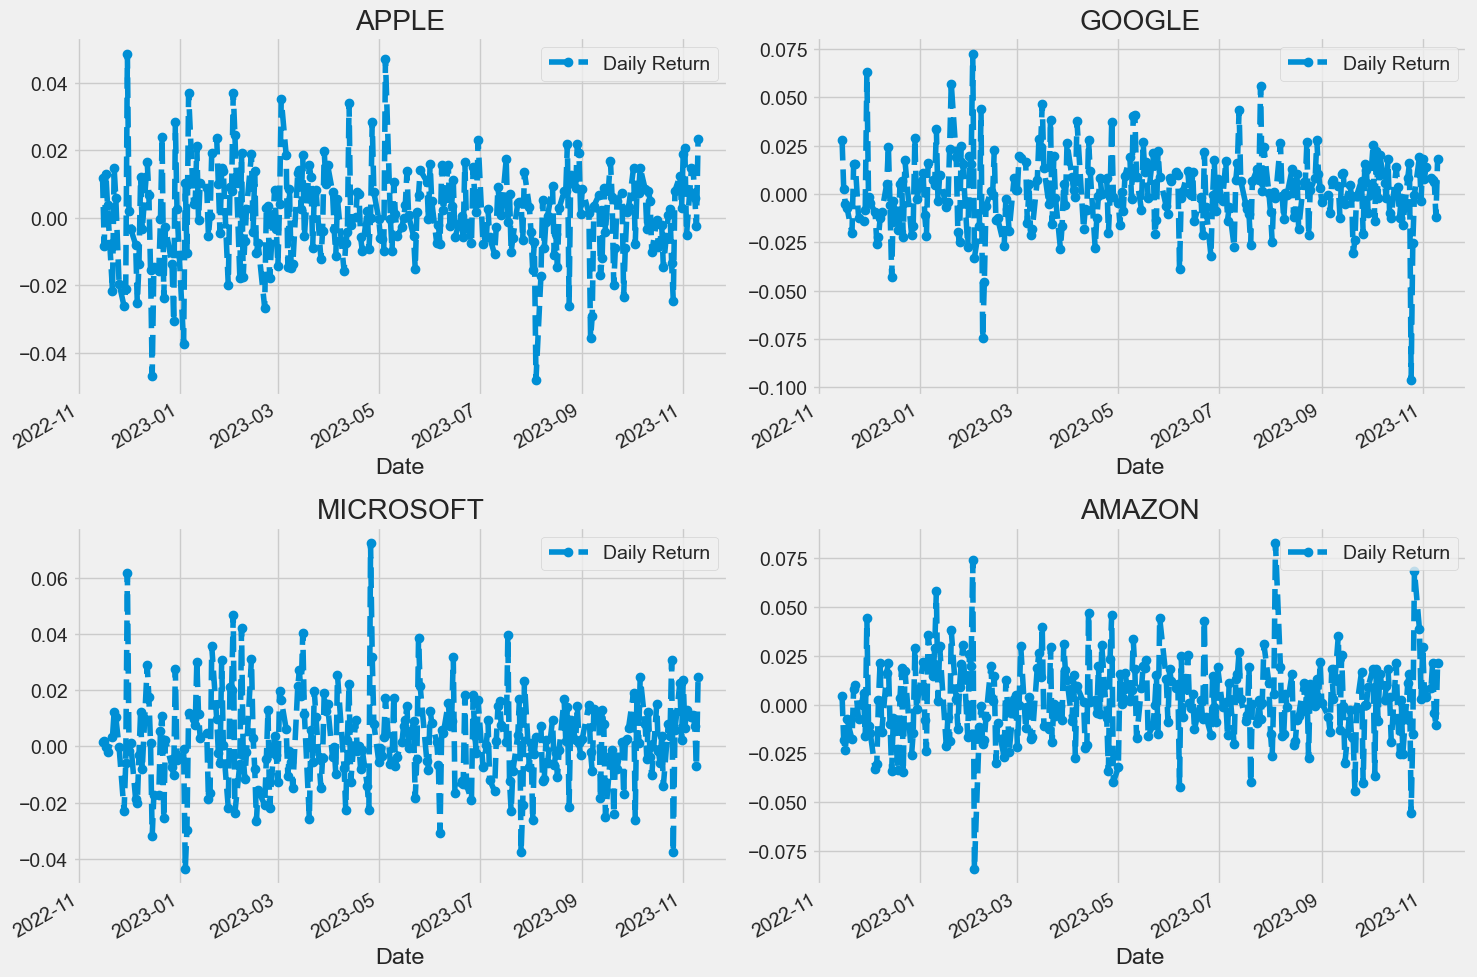

In [14]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

The code creates a histogram for the daily return of each tech company's stock (Apple, Google, Microsoft, and Amazon) and displays them in separate subplots. The histogram shows the frequency distribution of the daily return values for each company.






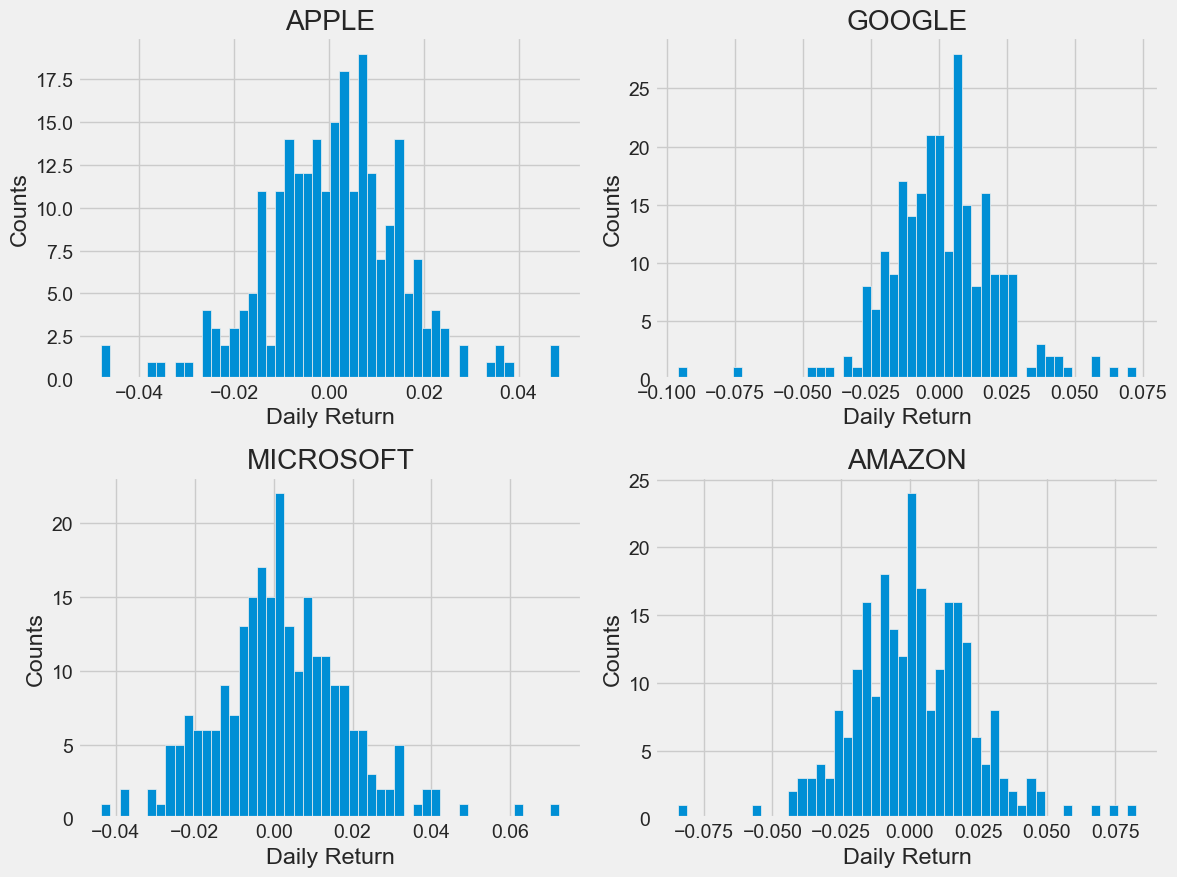

In [15]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

The code creates a DataFrame called closing_df that contains the adjusted closing prices for the tech stocks (Apple, Google, Microsoft, and Amazon) obtained using the Yahoo Finance API. It then creates a new DataFrame tech_rets, which calculates the daily percentage change in the adjusted closing prices of the tech stocks, representing their daily returns.






In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-11-14,NaN,NaN,NaN,NaN
2022-11-15,0.011870,0.004569,0.028012,0.001739
2022-11-16,-0.008331,-0.018395,0.002735,0.001823
2022-11-17,0.012971,-0.023373,-0.004950,-0.000207
2022-11-18,0.003782,-0.007485,-0.007107,-0.001903


The code uses Seaborn's jointplot to create a scatter plot, comparing the daily returns of Google's stock ('GOOG') against itself. Since



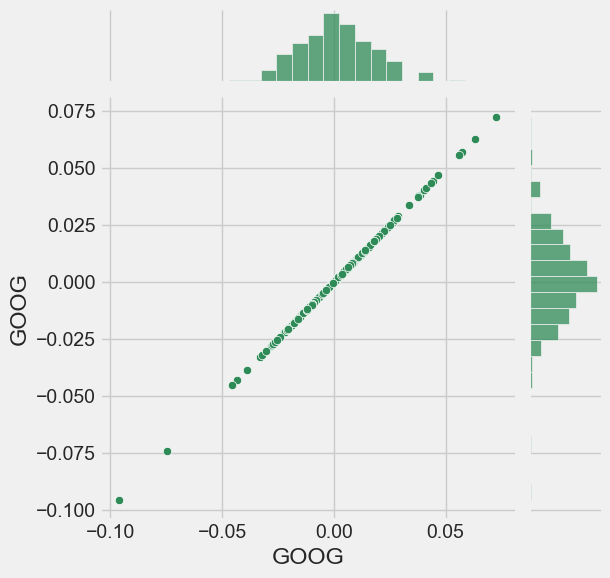

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

The code uses Seaborn's jointplot to create a scatter plot, comparing the daily returns of Google's stock ('GOOG') against Microsoft's stock ('MSFT'). It helps visualize the relationship between the two stock returns.






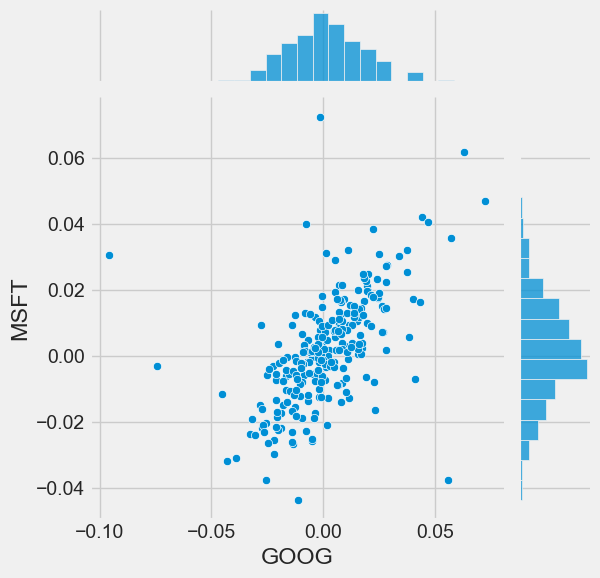

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

The code uses Seaborn's pairplot to create a grid of scatter plots, displaying the relationships between the daily returns of different tech stocks. Additionally, it includes regression lines to visualize the linear trends.






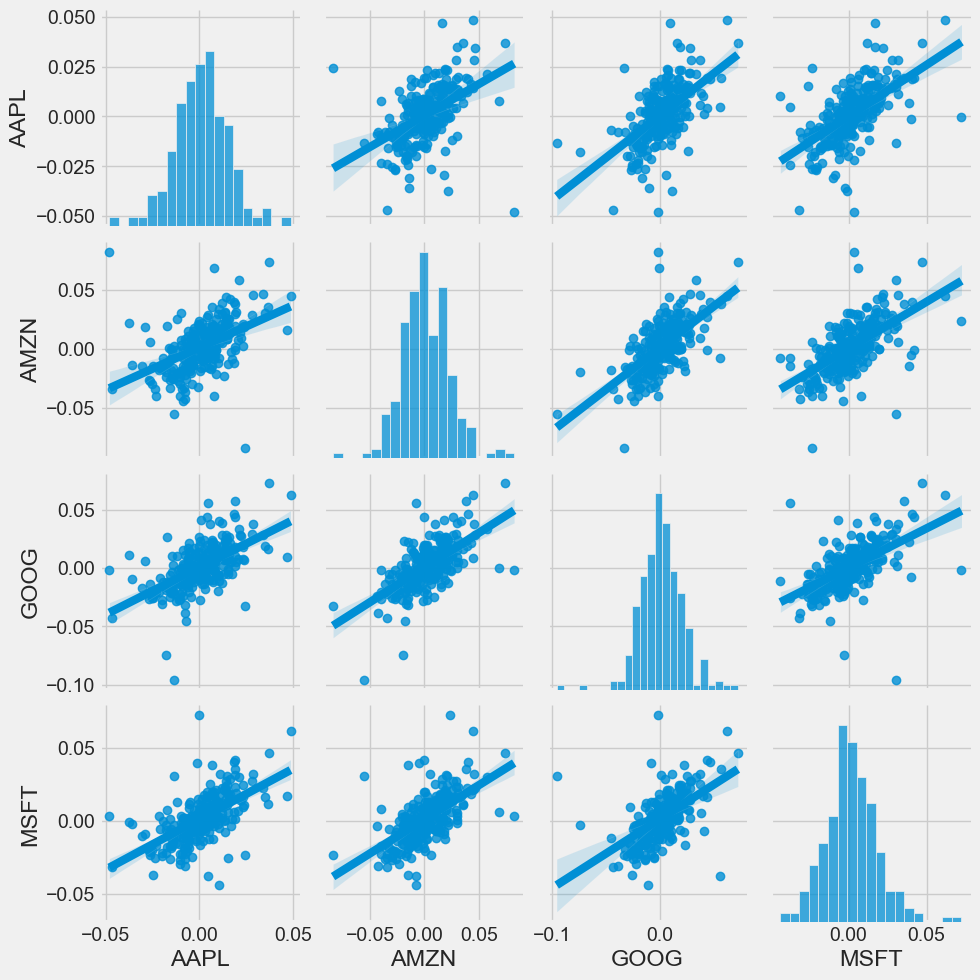

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

The code sets up a pair plot (return_fig) for visualizing relationships between different pairs of columns in the DataFrame tech_rets. It shows scatter plots for the upper triangle, kernel density estimation (KDE) plots for the lower triangle, and histograms for the diagonal to represent the daily return distributions for each column.






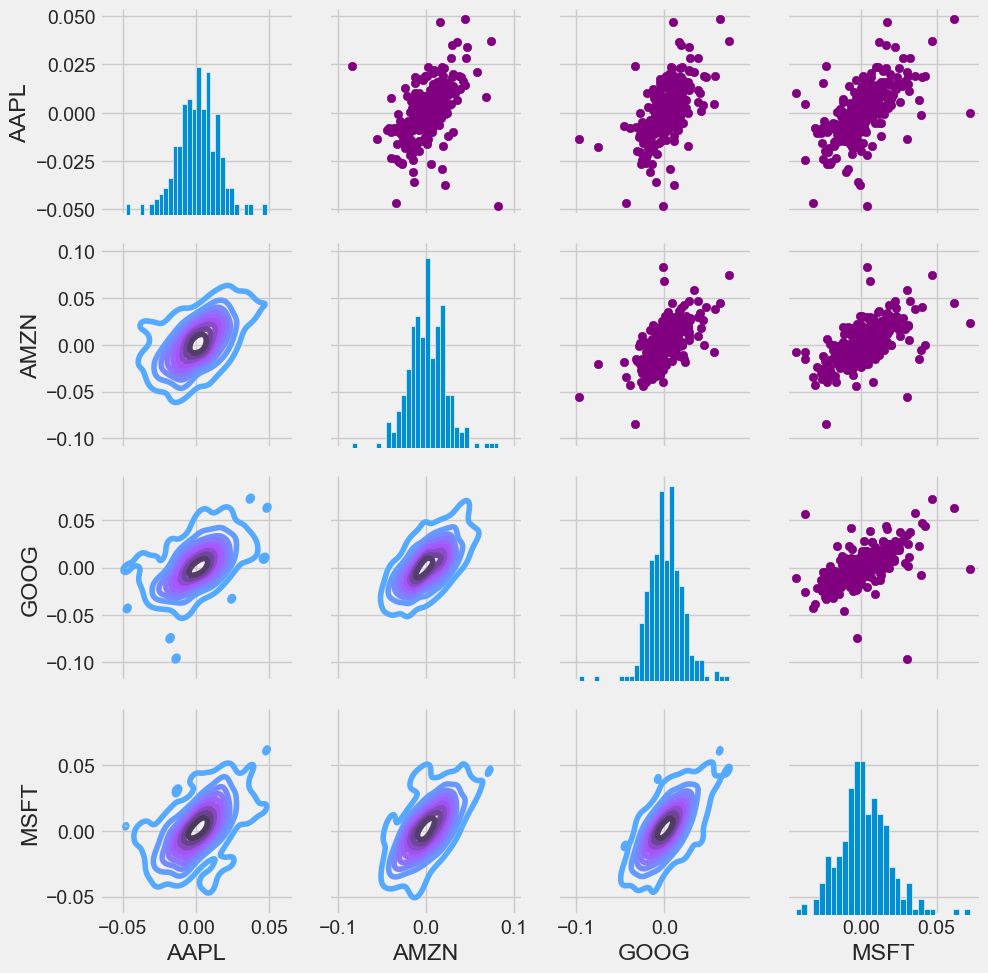

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

The code sets up a pair plot (returns_fig) for visualizing relationships between different pairs of columns in the DataFrame closing_df. It shows scatter plots for the upper triangle, kernel density estimation (KDE) plots for the lower triangle with a color map, and histograms for the diagonal to represent the daily return distributions for each column.






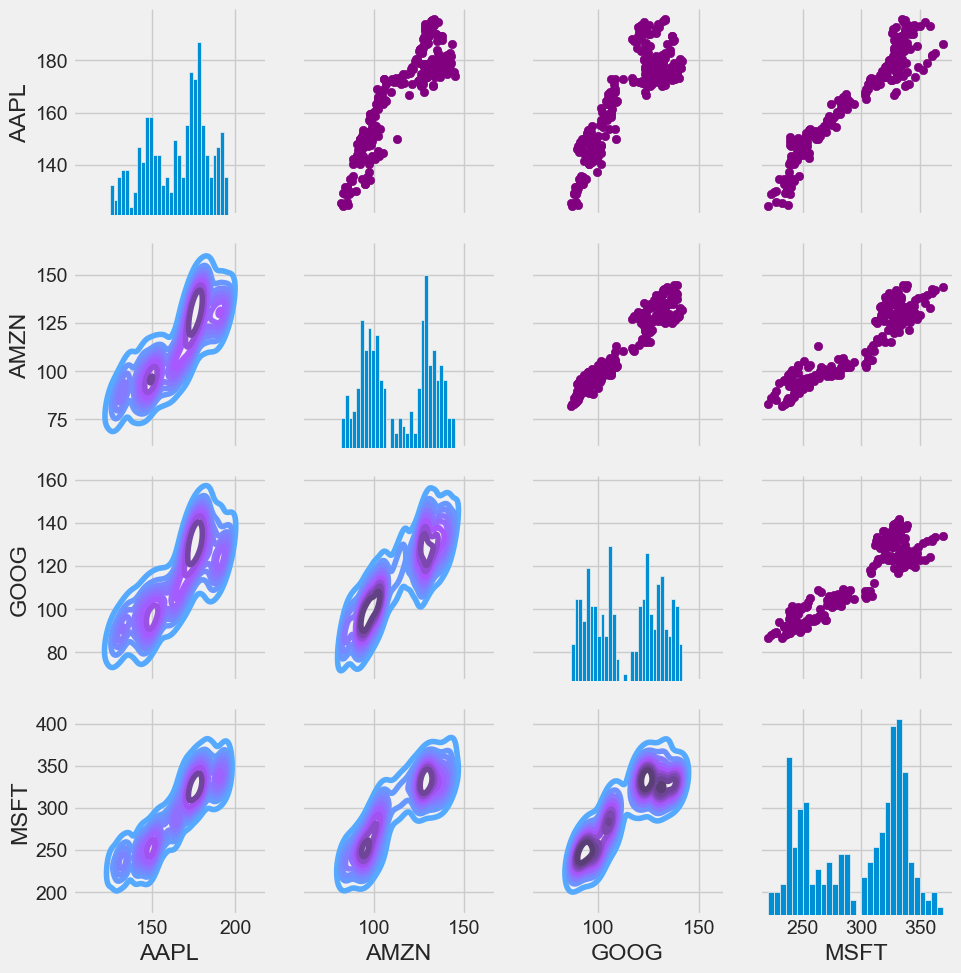

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

The code creates a 2x2 subplot figure and then plots two heatmaps using Seaborn. The first heatmap shows the correlation of stock returns in the DataFrame tech_rets, while the second heatmap shows the correlation of stock closing prices in the DataFrame closing_df.






Text(0.5, 1.0, 'Correlation of stock closing price')

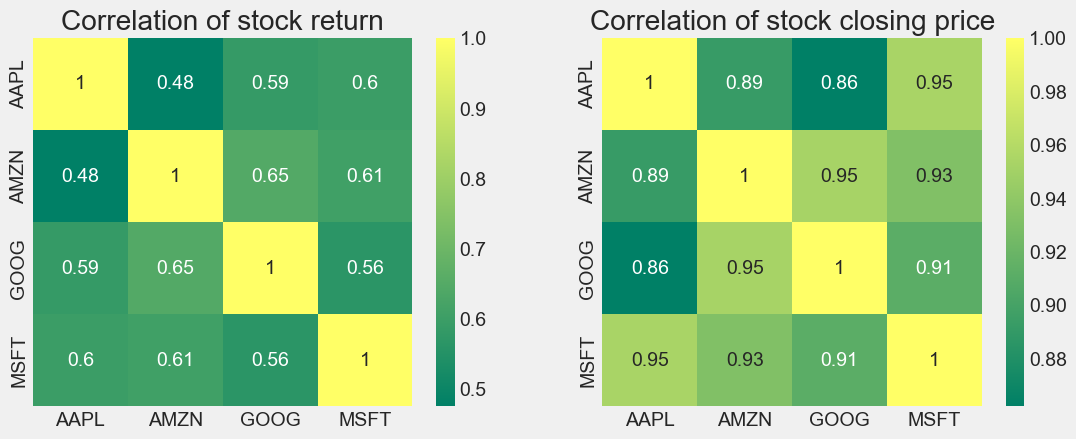

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 5. How much value do we put at risk by investing in a particular stock?

The code calculates the mean and standard deviation of stock returns in tech_rets, then creates a scatter plot to visualize the relationship between expected return and risk for each stock. It also annotates the data points with the stock labels for better readability.






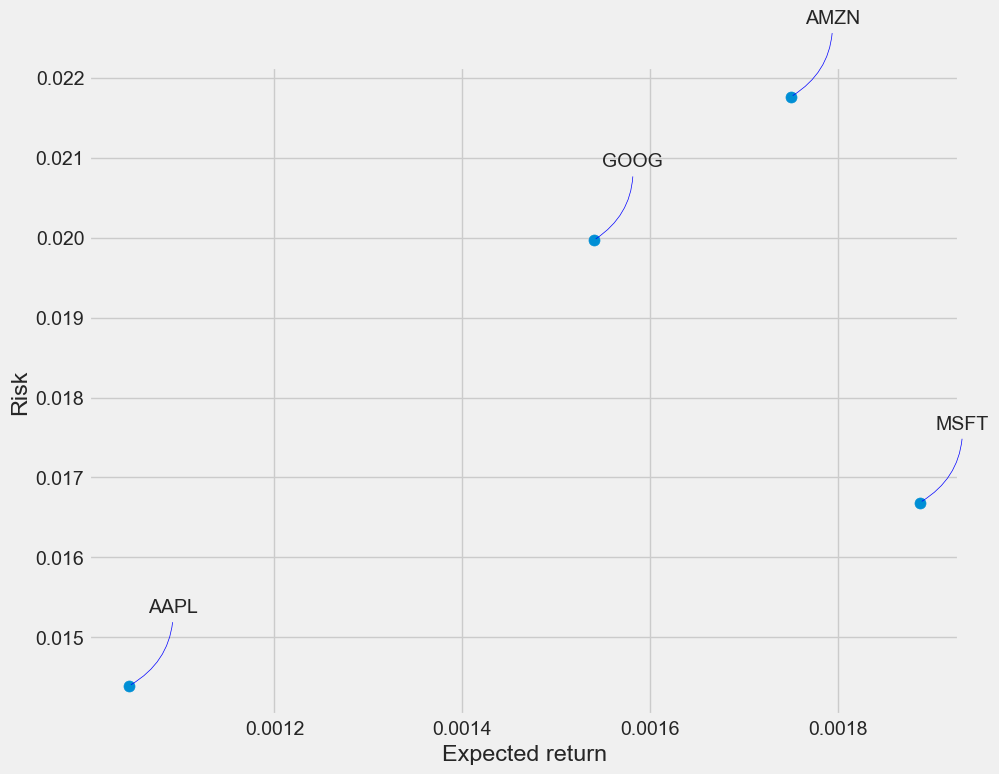

In [23]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

The code uses the pandas_datareader library to fetch historical stock price data for the company with the ticker symbol 'AAPL' (Apple Inc.) from the Yahoo Finance API. It then displays the retrieved stock data in a Pandas DataFrame format.






In [24]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449689,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516597,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655554,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787853,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767568,394024400
...,...,...,...,...,...,...
2023-11-06,176.380005,179.429993,176.210007,179.229996,178.994186,63841300
2023-11-07,179.179993,182.440002,178.970001,181.820007,181.580780,70530000
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300


The code creates a line plot to visualize the historical closing prices of a stock over time. The x-axis represents the date, and the y-axis shows the closing price of the stock in USD ($).






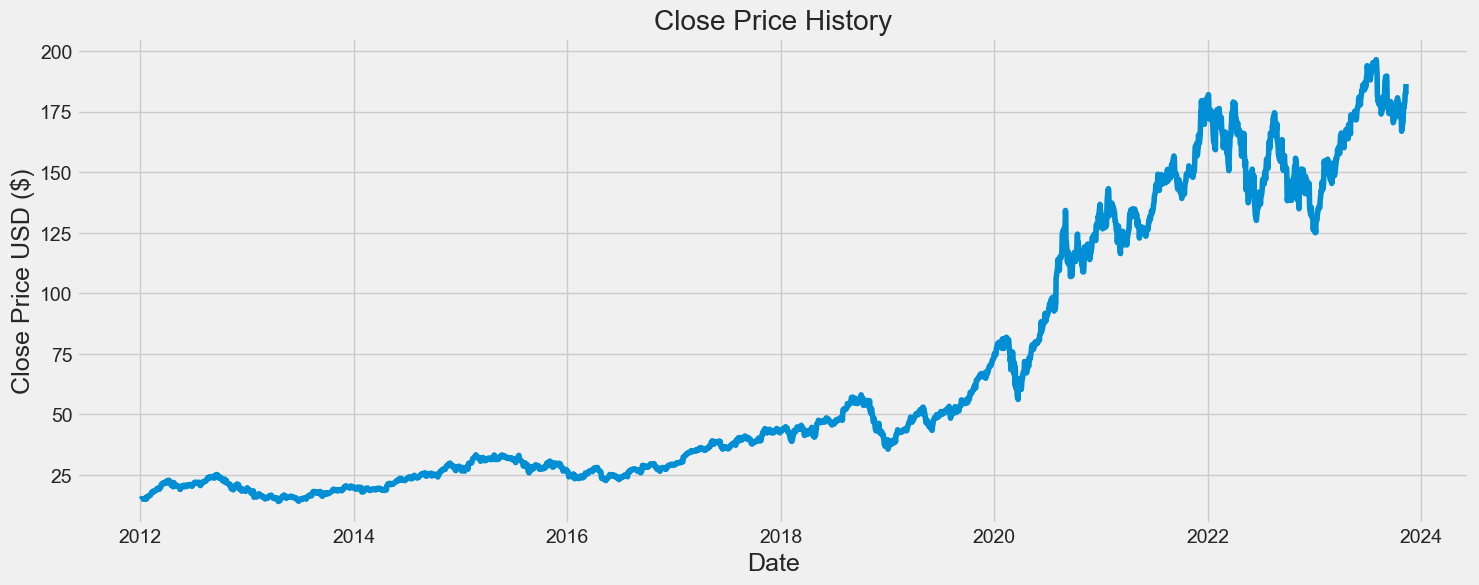

In [25]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

The code filters the 'Close' column from the dataframe, converts it into a numpy array, and calculates the number of rows (data points) to be used for training the model, which is 95% of the total dataset length.






In [26]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2836

The code uses Min-Max scaling to transform the data in the 'dataset' variable, making it range from 0 to 1, and stores the scaled data in the 'scaled_data' variable.






In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.92569966],
       [0.92306958],
       [0.94493224]])

The code prepares the training data for the time series model by creating sequences of 60 data points as input (x_train) and the corresponding target value for each sequence (y_train). It also reshapes the x_train data to have three dimensions, which is required for LSTM (Long Short-Term Memory) models.






In [29]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

The code builds an LSTM (Long Short-Term Memory) neural network model using Keras. It consists of two LSTM layers with 128 and 64 units, respectively, followed by two Dense layers with 25 and 1 unit. The model is compiled using the Adam optimizer and mean squared error loss. It is then trained on the x_train and y_train data with a batch size of 1 and for one epoch.






In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2776/2776 [==============================] - 59s 21ms/step - loss: 0.0014


The code prepares the testing data set by creating x_test and y_test datasets from scaled_data. It then uses the LSTM model to predict the stock price values for x_test, and subsequently, it converts the predictions back to their original scale. The root mean squared error (RMSE) is calculated to evaluate the model's performance.






In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 30ms/step


4.8044765593471634

The code visualizes the model's performance by plotting the training data, the validation data, and the predicted stock prices. It uses the "Close Price USD ($)" on the y-axis and dates on the x-axis. The plot shows how well the model's predictions match the actual validation data.






C:\Users\anmol\AppData\Local\Temp\ipykernel_3928\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


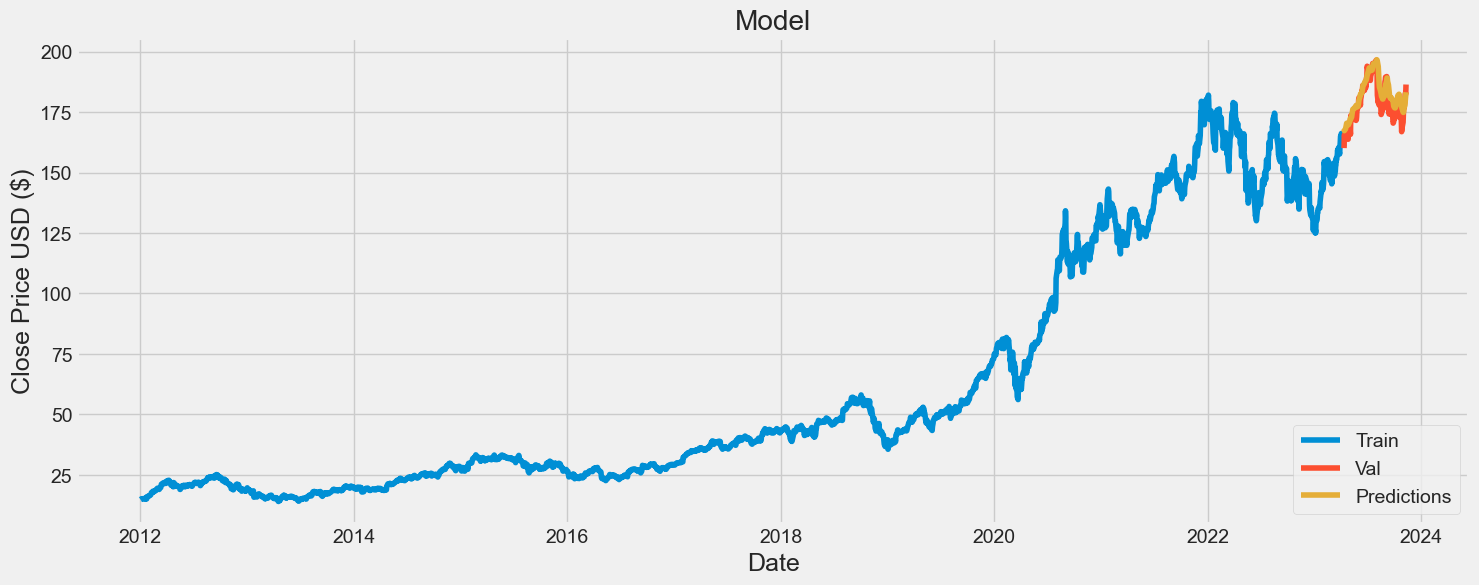

In [35]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-12,160.100006,167.990036
2023-04-13,165.559998,167.306549
2023-04-14,165.210007,167.520584
2023-04-17,165.229996,167.984314
2023-04-18,166.470001,168.491180
...,...,...
2023-11-06,179.229996,177.725922
2023-11-07,181.820007,179.035934
2023-11-08,182.889999,180.561432


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.